# Topic 5 DQ 2

Linear regression is a powerful tool for modeling relationships between variables in a dataset. However, there are limitations to linear regression that may result in biased or inaccurate predictions. Discuss at least two common assumptions of linear regression models and the potential consequences of violating these assumptions. How can Python be used to diagnose and address violations of these assumptions in a linear regression model? Provide at least one example of a linear regression model that violates one of these assumptions and how it can be improved.

Prepare your answer as follows:

    - Provide a professionally written answer, anchored in scholarly work.﻿
    - Create a diagram, table, or other visual prop to help explain your answer and include 1–2 sentences describing the visual.
    - Include a Jupyter notebook with the relevant Python code you created.
    - Record a short 2- to 3-minute video (using tools like Zoom or Loom) in which you explain your answer and code. Use an online video platform such as Loom, YouTube, or Vimeo to upload your completed video. Include the link to the video in your answer.

### Definition:
    
   Linear regression is a statistical method used to model the relationship between one or more independent variables (predictors) and a dependent variable (response).


### The general idea of regression

All models define the outcome (Y) as a function of one or more parameters and an independent variable (X).





### Why linear regression is important:

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.
    
You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.

### The goals of regression 
Scientists use regression with one of three distinct goals:
- To fit a model to your data in order to obtain best-fit values of the parameters, or to compare the fits of alternative models. 
- To fit a smooth curve in order to interpolate values from the curve, or perhaps to draw a graph with a smooth curve. 
- To make predictions. 


#### Discuss at least two common assumptions of linear regression models and the potential consequences of violating these assumptions.

To answer the question regarding the assumptions and potential consequences of linear regression violations, we will begin by explaining 3 common assumptions:


1. Linear and Additive
    
If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.

2. Multicollinearity

It occurs when the independent variables show moderate to high correlation. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.


3. Homoscedasticity:

This assumption states that the variance of the residuals is constant across all levels of the independent variables. If this assumption is violated (i.e., if there is heteroscedasticity), it can lead to inefficient coefficient estimates and incorrect standard errors, affecting the hypothesis tests for the coefficients.


In [31]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np 

In [32]:
#read the dataset
df = pd.read_csv("happyscore_income.csv")
df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [33]:
df1 = df[["avg_income", "median_income", "happyScore", "income_inequality"]]
df1.head()

,avg_income,median_income,happyScore,income_inequality
0,2096.76,1731.506667,4.350,31.445556
1,1448.88,1044.240000,4.033,42.720000
2,7101.12,5109.400000,6.574,45.475556
3,19457.04,16879.620000,7.200,30.296250
4,19917.00,15846.060000,7.284,35.285000


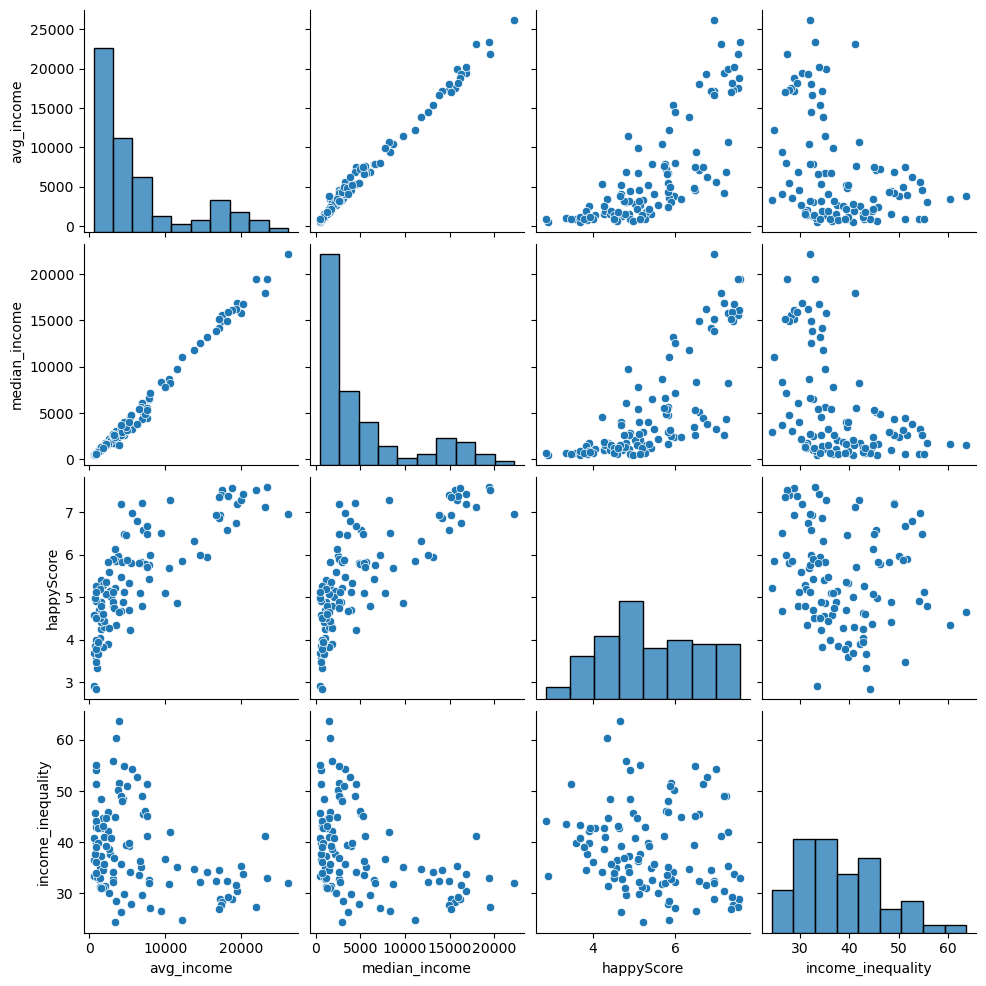

In [34]:
p = sns.pairplot(df1)

# 1. Linearity

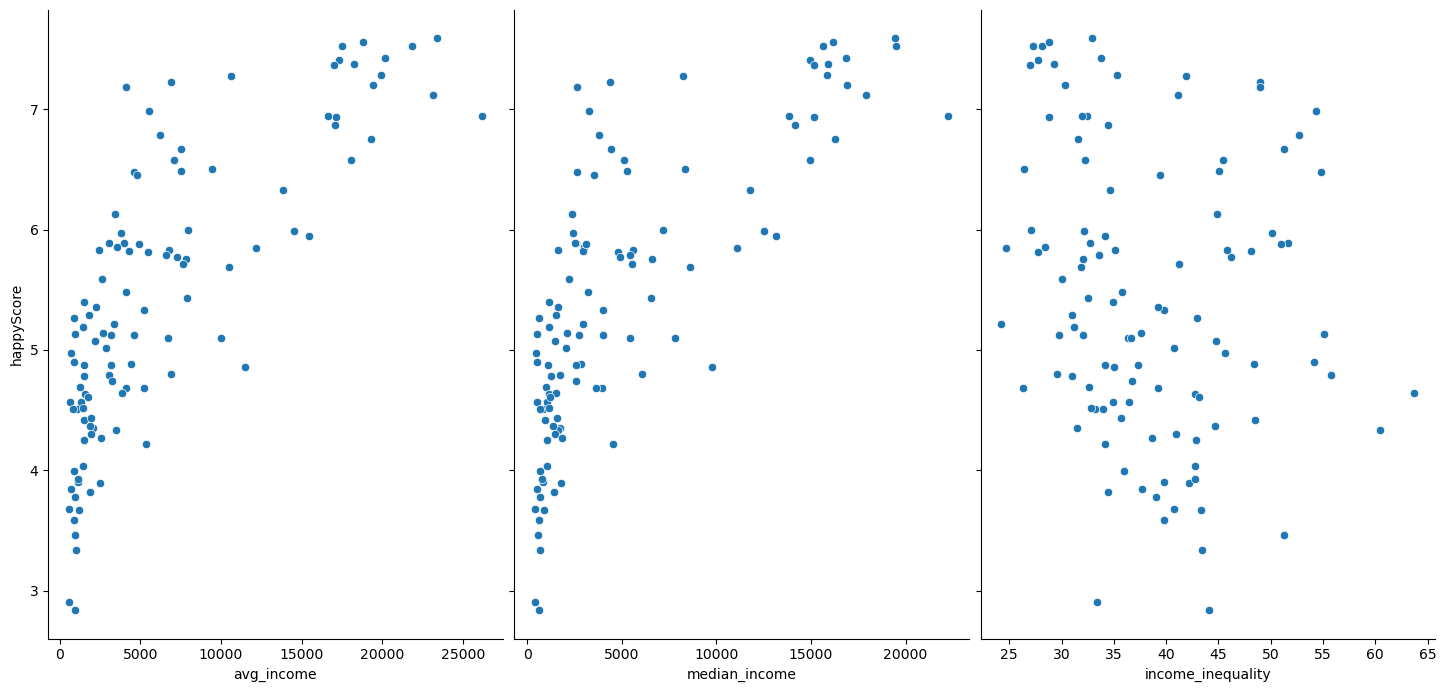

In [35]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df1, x_vars=['avg_income','median_income', 'income_inequality'], y_vars='happyScore', size=7, aspect=0.7)


Looking at the graphs, we can see that with the "happyScore" variable, none of the independent variables has a precise linear shape, but avg_income and median_income still do better than income_inequality, which seems to have virtually no specific shape. This shows that linear regression may not be the best model. 

The other assumptions require us to run the regression before we can check them. 

##### So let's run a regression.
Fitting the linear model


In [36]:
x = df1.drop(["happyScore"],axis=1)
y = df1.happyScore

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [40]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.6356873100111717


# 2. Multicollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{df1.columns[i]: variance_inflation_factor(df1.values, i) for i in range(0, df1.shape[1])}

{'avg_income': 307.77193950597757,
 'median_income': 307.828978173969,
 'happyScore': 36.606299987819625,
 'income_inequality': 25.184809146642984}

# 3. Check for Homoscedasticity

Residuals as we know are the differences between the true value and the predicted value. 

In [41]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.9962645483859644e-16


Very close to zero so all good here.

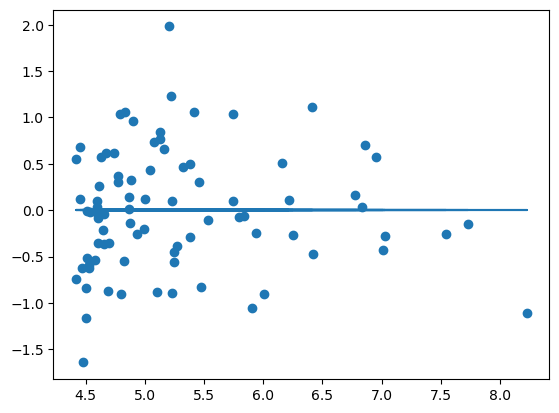

In [49]:
#p = sns.scatterplot(y_pred,residuals)

plt.scatter(y_pred, residuals)
plt.plot(y_pred, [0]*len(y_pred))



# data set:

https://www.kaggle.com/datasets/levyedgar44/income-and-happiness-correction


# References:

Analyticsvidhya. 6 Assumptions of Linear Regression :Plots and Solutions. https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/ 

IBM. What is linear regression?. https://www.ibm.com/topics/linear-regression 

Graphpad. The goal of regression. https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_the-goal-of-regression.htm 

